In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [10]:
car = pd.read_csv('/content/car data.csv')

In [11]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
car.shape

(301, 9)

In [14]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [16]:
print(car.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [17]:
print(car.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [18]:
print(car.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [20]:
print(car.Year.value_counts())

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64


In [21]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-21-10625a2719c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-21-10625a2719c7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-21-10625a2719c7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [22]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [25]:
x = car.drop(['Car_Name','Selling_Price'],axis=1)
y = car['Selling_Price']

In [26]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0    2014           5.59       27000          0            0             0      0
1    2013           9.54       43000          1            0             0      0
2    2017           9.85        6900          0            0             0      0
3    2011           4.15        5200          0            0             0      0
4    2014           6.87       42450          1            0             0      0
..    ...            ...         ...        ...          ...           ...    ...
296  2016          11.60       33988          1            0             0      0
297  2015           5.90       60000          0            0             0      0
298  2009          11.00       87934          0            0             0      0
299  2017          12.50        9000          1            0             0      0
300  2016           5.90        5464          0            0             0      0

[301 rows x 7 c

In [27]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.1,random_state=2)


In [41]:
lin = LinearRegression()

In [29]:
lin.fit(x_train,y_train)

LinearRegression()

In [31]:
prediction = lin.predict(x_train)

In [32]:
print(prediction)

[11.03495511  0.0587425   4.98734157  3.37519499 10.49461963  4.48096185
  3.44194637  5.79303592 -0.55653713  5.72317441  6.95741558  4.60885803
  0.65127991  9.14398511  2.73019734  0.57231936  1.05331842  0.90566946
  9.19110393  4.80724986  0.75081153  8.97436005  0.52378125 10.43208421
 -0.1215052   6.98859921  0.76010365  0.2         3.99921639  1.83570043
  1.57201626]


In [33]:
error_score = metrics.r2_score(y_train,prediction)
print(error_score)

0.9616016091605228


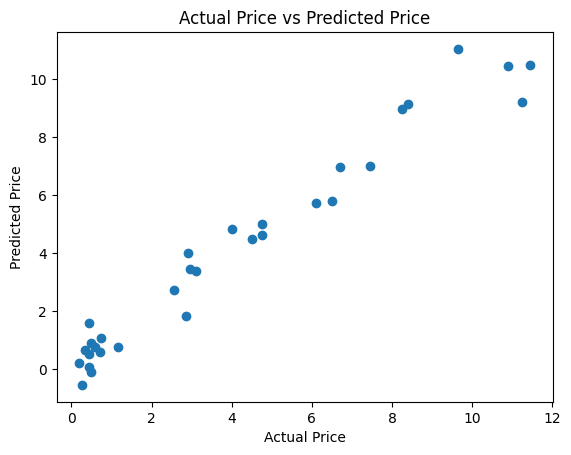

In [35]:
plt.scatter(y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [36]:
pred = lin.predict(x_test)

In [38]:
error_score = metrics.r2_score(y_test,pred)
print(error_score)


0.7539954361032246


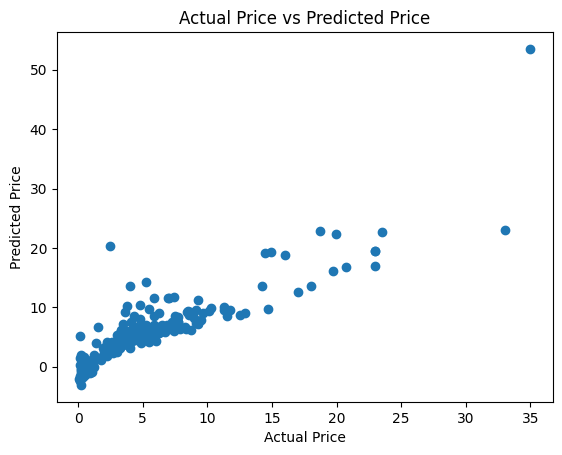

In [40]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [42]:
#Lasso

In [43]:
las = Lasso()

In [44]:
las.fit(x_train,y_train)

Lasso()

In [45]:
prediction = las.predict(x_train)

In [46]:
print(prediction)

[12.67969261  0.81637508  4.41217761  3.85877108  9.42050076  4.24112215
  4.91630735  5.58546346  0.57870936  5.05153334  6.4715811   4.51680328
  0.63831532  8.6628257   2.8716838   0.9939211   0.94439427  0.72050823
  8.56141828  3.84816323  1.8185329   8.79404552  0.71086777  8.67351155
  0.88483676  6.64269382  0.85602568  0.53871953  3.09789479  2.82228213
  0.74032244]


In [47]:
error_score = metrics.r2_score(y_train,prediction)
print(error_score)

0.9148157845262993


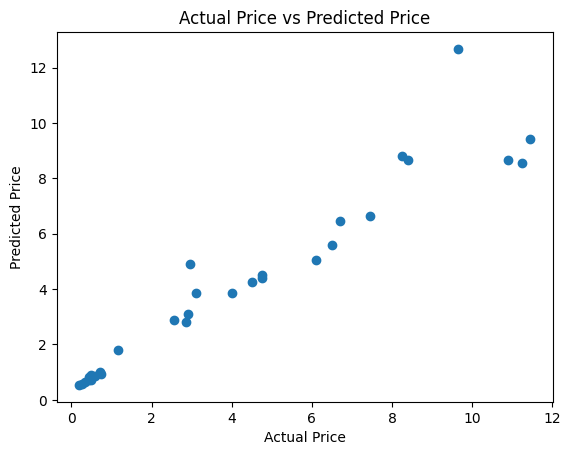

In [48]:

plt.scatter(y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [50]:
pred = las.predict(x_test)

In [51]:
error_score = metrics.r2_score(y_test,pred)
print(error_score)


0.7474296580890054


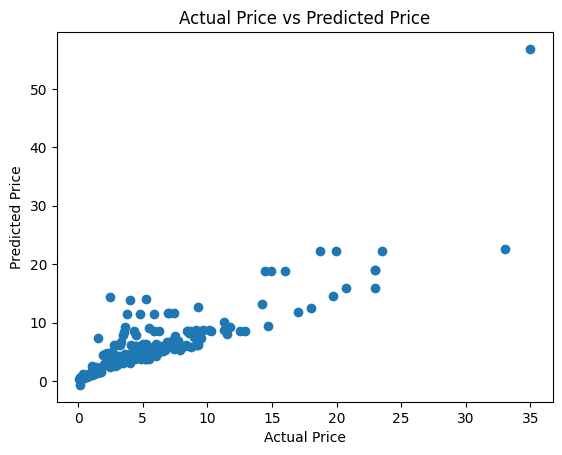

In [52]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()